# Air Traffic Data

Provided by Government of India

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
q1_df = pd.read_csv("Countrywise_DGCA_Q1_2017.csv")
q2_df = pd.read_csv("Countrywise_DGCA_Q2_2017.csv")
q3_df = pd.read_csv("Countrywise_DGCA_Q3_2017.csv")
q4_df = pd.read_csv("Countrywise_DGCA_Q4_2017.csv")

In [3]:
q1_df.head()

,Sl. No.,NAME OF THE COUNTRY,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,1,AFGHANISTAN,45563,43380,342.5,1244.2
1,2,AUSTRALIA,16701,19729,116.1,294.2
2,3,AUSTRIA,6916,7745,166.5,144.5
3,4,AZERBAIJAN,8414,8600,0,0
4,5,BAHRAIN,127547,140955,228.3,2373.6


In [4]:
q2_df.head() 

,Sl. No.,NAME OF THE COUNTRY,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,1,AFGHANISTAN,32611,39322,185.4,1203.5
1,2,AUSTRALIA,17987,19549,93.9,248.2
2,3,AUSTRIA,5864,7217,216.4,115.7
3,4,AZERBAIJAN,0,0,0.0,0.0
4,5,BAHRAIN,147406,130157,262.9,2453.7


In [5]:
q3_df.head()

,Sl. No.,NAME OF THE COUNTRY,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,1,AFGHANISTAN,32098,27163,115.0,623.6
1,2,AUSTRALIA,18485,19459,186.0,453.8
2,3,AUSTRIA,6724,6609,314.6,143.9
3,4,AZERBAIJAN,0,0,0.0,0.0
4,5,BAHRAIN,129177,138054,190.9,2503.0


In [6]:
q4_df.head()

,Sl. No.,NAME OF THE COUNTRY,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,1,AFGHANISTAN,42144,36124,248.2,1187.0
1,2,AUSTRALIA,19065,20407,296.3,508.8
2,3,AUSTRIA,8660,5429,295.5,166.3
3,4,AZERBAIJAN,0,0,0.0,0.0
4,5,BAHRAIN,133827,125136,316.0,2341.7


In [7]:
columns = ['s_no', 'country_name', 'pass_to_India', 'pass_from_India', 'freight_to_India', 'freight_from_India']
q1_df.columns = columns
q2_df.columns = columns
q3_df.columns = columns
q4_df.columns = columns

In [8]:
q1_df = q1_df.drop('s_no', axis = 1)
q2_df = q2_df.drop('s_no', axis = 1)
q3_df = q3_df.drop('s_no', axis = 1)
q4_df = q4_df.drop('s_no', axis = 1)

In [9]:
q1_df = q1_df.drop([58])
q2_df = q2_df.drop([59])
q3_df = q3_df.drop([59])
q4_df = q4_df.drop([59])

### Adding missing country data

There are some countries in quarter 2, 3, and 4 data that do not appear in quarter 1. Some countries are missing in quarter 3 and 4 that are a part of quarter 2 data and vice-versa.

So, to have a uniformity in dataframes and for future purposes all the missing countries are added to respective dataframes.

In [10]:
def add_missing_countries(df_absent, df_present):
    bool_list = [False] * df_present.country_name.size
    
    for i in range(df_present.country_name.size):
        for j in range(df_absent.country_name.size):
            if df_present.country_name.iloc[i] == df_absent.country_name.iloc[j]:
                bool_list[i] = True
                
    return (df_absent.append(pd.DataFrame([[df_present.country_name[i], df_present.pass_to_India[i], 
                                            df_present.pass_from_India[i], df_present.freight_to_India[i], 
                                            df_present.freight_from_India[i]] 
                                           for i in range(len(bool_list)) if not bool_list[i]], 
                                          columns=columns[1:])).sort_values(by = ['country_name']))

In [11]:
q1_df = add_missing_countries(q1_df, q2_df)
q1_df.reindex()
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 57
Data columns (total 5 columns):
country_name          59 non-null object
pass_to_India         59 non-null int64
pass_from_India       59 non-null int64
freight_to_India      59 non-null object
freight_from_India    59 non-null object
dtypes: int64(2), object(3)
memory usage: 2.8+ KB


In [12]:
q1_df = add_missing_countries(q1_df, q3_df)
q1_df.reindex()
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 57
Data columns (total 5 columns):
country_name          61 non-null object
pass_to_India         61 non-null int64
pass_from_India       61 non-null int64
freight_to_India      61 non-null object
freight_from_India    61 non-null object
dtypes: int64(2), object(3)
memory usage: 2.9+ KB


In [13]:
q2_df = add_missing_countries(q2_df, q3_df)
q2_df.reindex()
q2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 58
Data columns (total 5 columns):
country_name          61 non-null object
pass_to_India         61 non-null int64
pass_from_India       61 non-null int64
freight_to_India      61 non-null float64
freight_from_India    61 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.9+ KB


In [14]:
q3_df = add_missing_countries(q3_df, q2_df)
q3_df.reindex()
q3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 58
Data columns (total 5 columns):
country_name          61 non-null object
pass_to_India         61 non-null int64
pass_from_India       61 non-null int64
freight_to_India      61 non-null float64
freight_from_India    61 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.9+ KB


In [15]:
q4_df = add_missing_countries(q4_df, q2_df)
q4_df.reindex()
q4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 58
Data columns (total 5 columns):
country_name          61 non-null object
pass_to_India         61 non-null int64
pass_from_India       61 non-null int64
freight_to_India      61 non-null float64
freight_from_India    61 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.9+ KB


In [16]:
for i in q1_df:
    if i == 'country_name':
        q1_df[i] = q1_df[i].astype('category')
    elif i == 'pass_to_India' or i == 'pass_from_India':
        q1_df[i] = q1_df[i].astype('int64')
    elif i == 'freight_to_India' or i == 'freight_from_India':
        q1_df[i] = q1_df[i].astype('float64')

In [17]:
for i in q2_df:
    if i == 'country_name':
        q2_df[i] = q2_df[i].astype('category')
    elif i == 'pass_to_India' or i == 'pass_from_India':
        q2_df[i] = q2_df[i].astype('int64')
    elif i == 'freight_to_India' or i == 'freight_from_India':
        q2_df[i] = q2_df[i].astype('float64')

In [18]:
for i in q3_df:
    if i == 'country_name':
        q3_df[i] = q3_df[i].astype('category')
    elif i == 'pass_to_India' or i == 'pass_from_India':
        q3_df[i] = q3_df[i].astype('int64')
    elif i == 'freight_to_India' or i == 'freight_from_India':
        q3_df[i] = q3_df[i].astype('float64')

In [19]:
for i in q4_df:
    if i == 'country_name':
        q4_df[i] = q4_df[i].astype('category')
    elif i == 'pass_to_India' or i == 'pass_from_India':
        q4_df[i] = q4_df[i].astype('int64')
    elif i == 'freight_to_India' or i == 'freight_from_India':
        q4_df[i] = q4_df[i].astype('float64')

In [20]:
print(q1_df.info(), "\n\n")
print(q2_df.info(), "\n\n")
print(q3_df.info(), "\n\n")
print(q4_df.info(), "\n\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 57
Data columns (total 5 columns):
country_name          61 non-null category
pass_to_India         61 non-null int64
pass_from_India       61 non-null int64
freight_to_India      61 non-null float64
freight_from_India    61 non-null float64
dtypes: category(1), float64(2), int64(2)
memory usage: 5.4 KB
None 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 58
Data columns (total 5 columns):
country_name          61 non-null category
pass_to_India         61 non-null int64
pass_from_India       61 non-null int64
freight_to_India      61 non-null float64
freight_from_India    61 non-null float64
dtypes: category(1), float64(2), int64(2)
memory usage: 7.9 KB
None 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 58
Data columns (total 5 columns):
country_name          61 non-null category
pass_to_India         61 non-null int64
pass_from_India       61 non-null int64
freight_to_Indi

In [21]:
sns.set_style("darkgrid")

<Figure size 432x288 with 0 Axes>

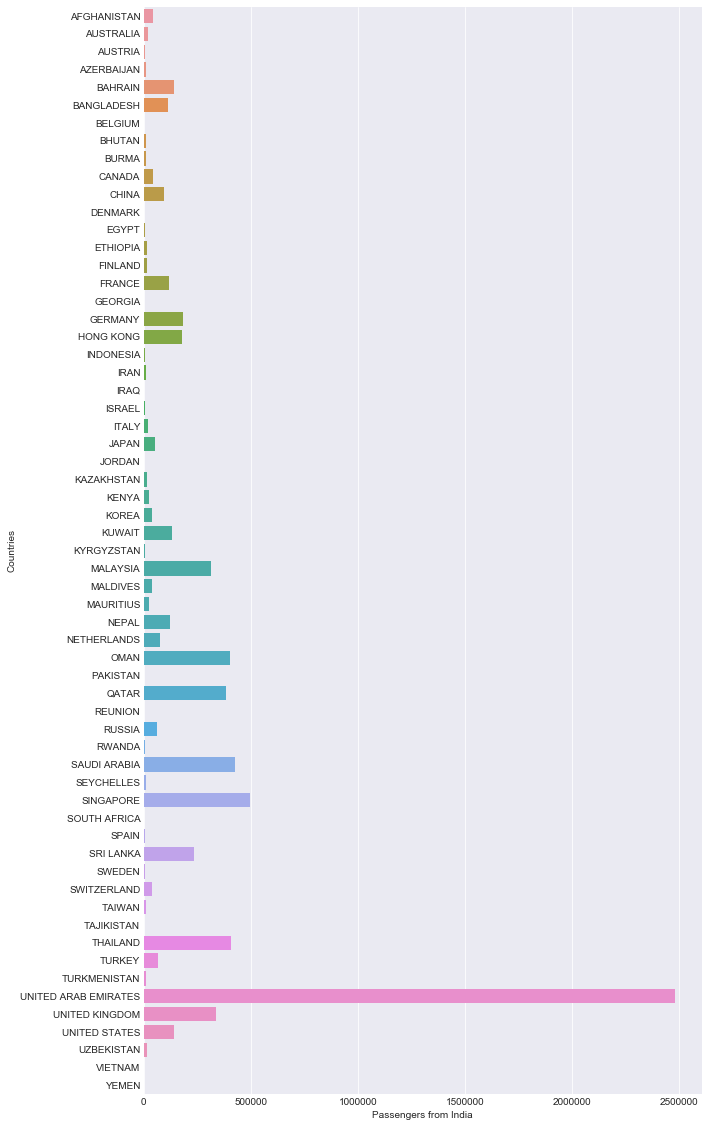

In [22]:
plt.figure(figsize=(10,20))
sns.barplot(x = q1_df.pass_from_India, y = q1_df.country_name)
plt.ylabel("Countries")
plt.xlabel("Passengers from India")
plt.show();

<Figure size 432x288 with 0 Axes>

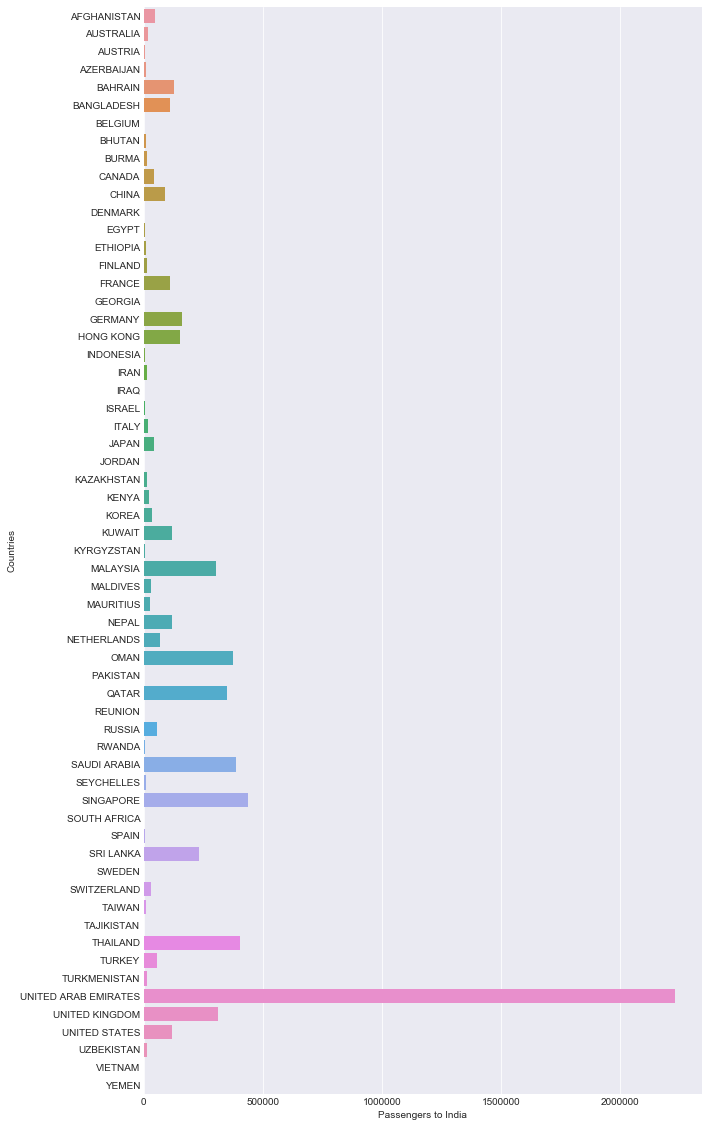

In [23]:
plt.figure(figsize=(10,20))
sns.barplot(x = q1_df.pass_to_India, y = q1_df.country_name)
plt.ylabel("Countries")
plt.xlabel("Passengers to India")
plt.show();

<Figure size 432x288 with 0 Axes>

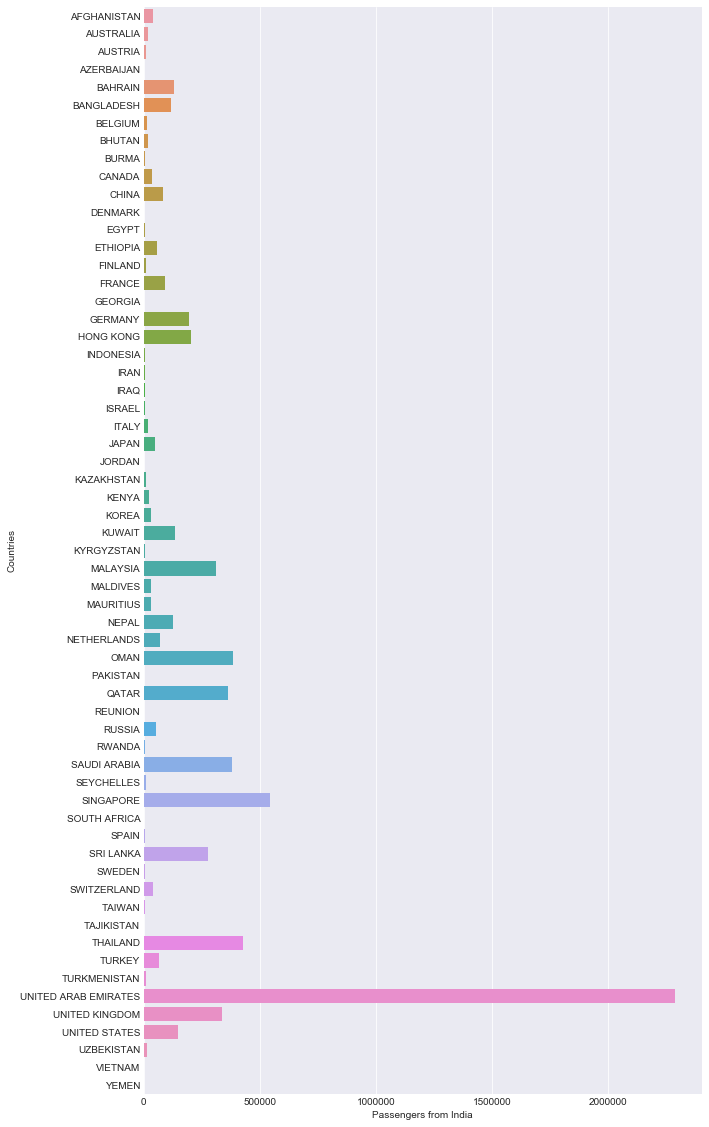

In [24]:
plt.figure(figsize=(10,20))
sns.barplot(x = q2_df.pass_from_India, y = q2_df.country_name)
plt.ylabel("Countries")
plt.xlabel("Passengers from India")
plt.show();

<Figure size 432x288 with 0 Axes>

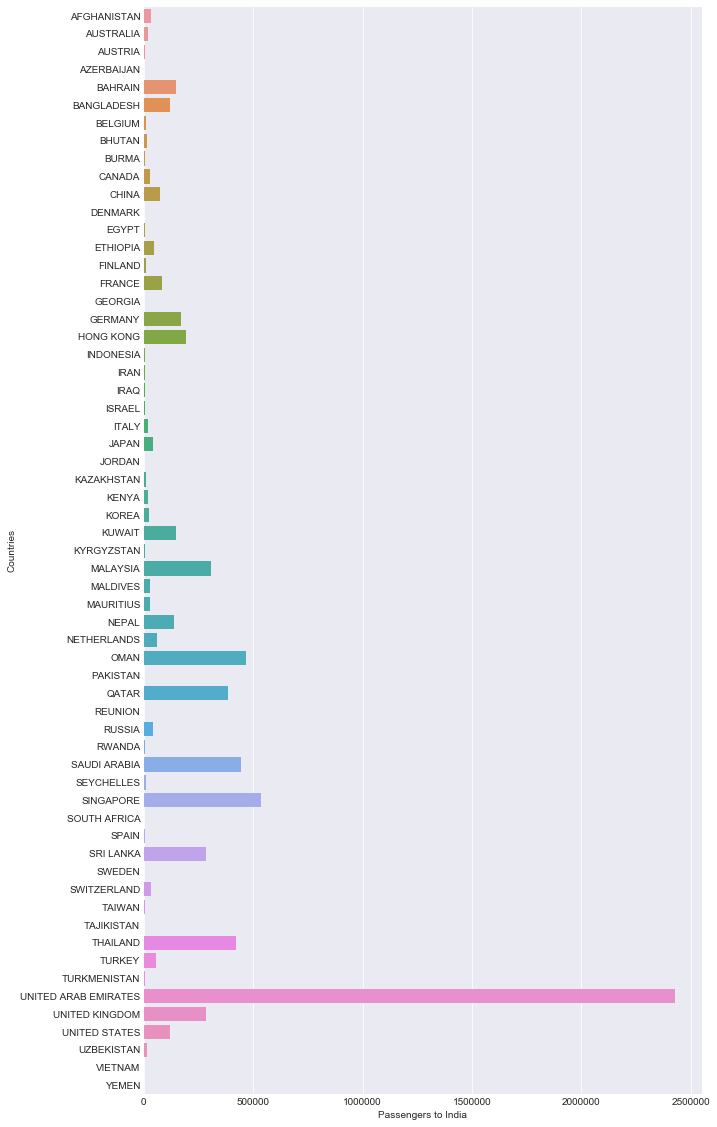

In [25]:
plt.figure(figsize=(10,20))
sns.barplot(x = q2_df.pass_to_India, y = q2_df.country_name)
plt.ylabel("Countries")
plt.xlabel("Passengers to India")
plt.show();

<Figure size 432x288 with 0 Axes>

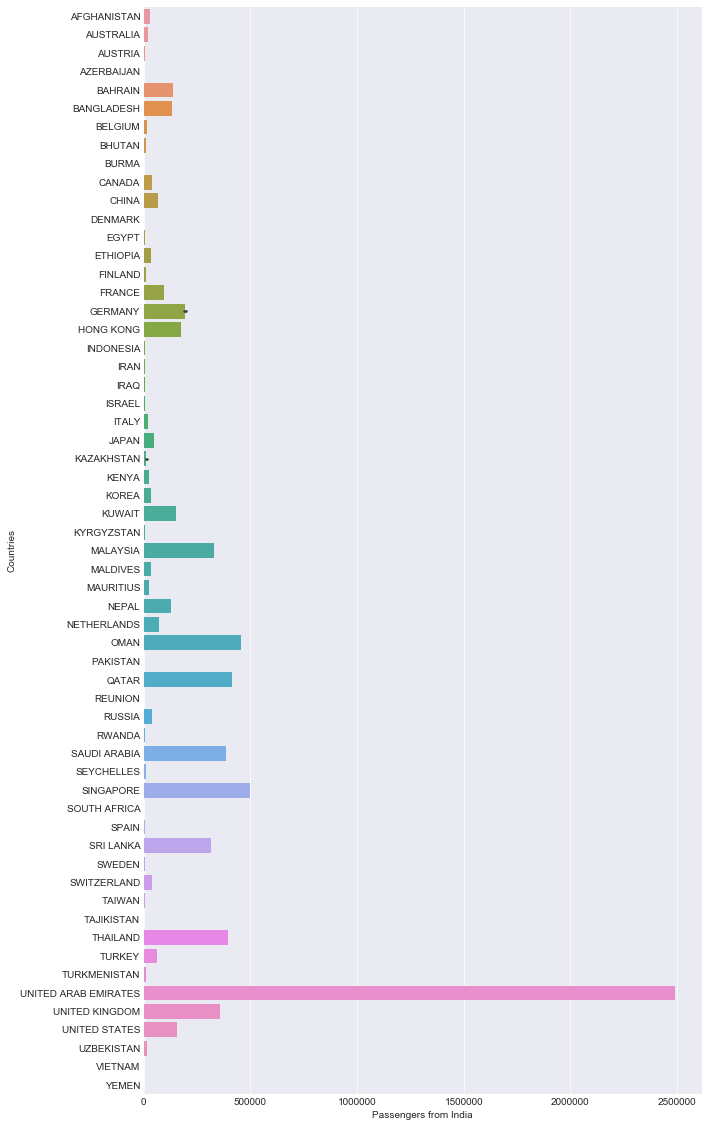

In [26]:
plt.figure(figsize=(10,20))
sns.barplot(x = q3_df.pass_from_India, y = q3_df.country_name)
plt.ylabel("Countries")
plt.xlabel("Passengers from India")
plt.show();

<Figure size 432x288 with 0 Axes>

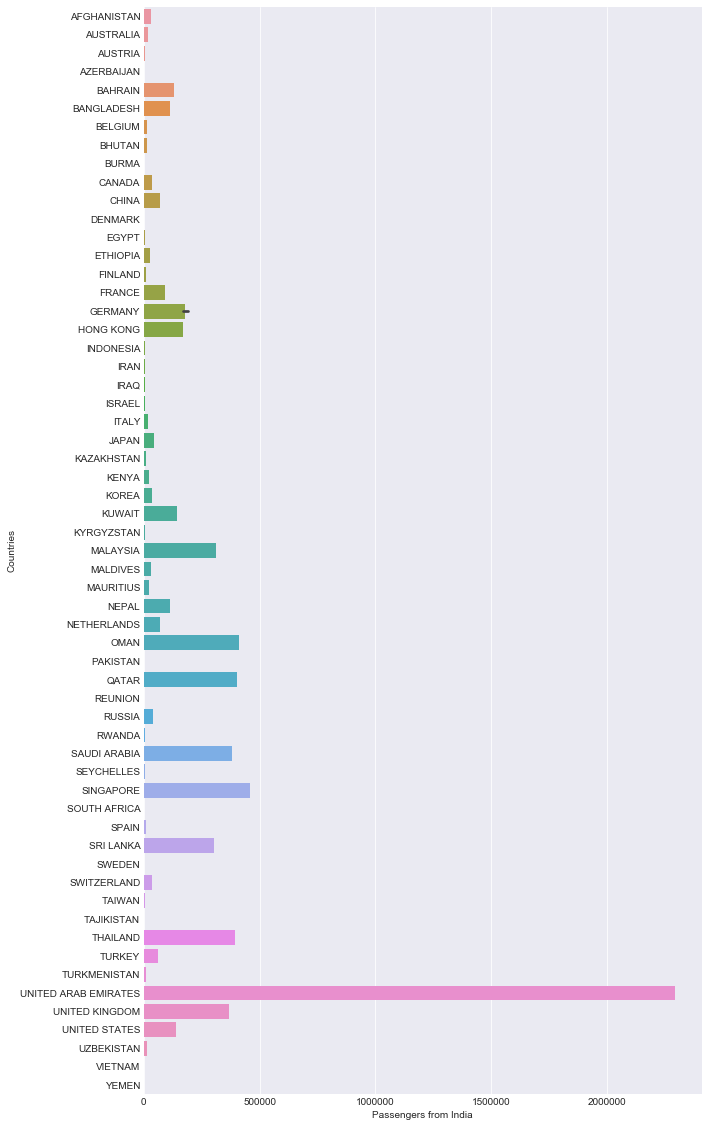

In [27]:
plt.figure(figsize=(10,20))
sns.barplot(x = q3_df.pass_to_India, y = q3_df.country_name)
plt.ylabel("Countries")
plt.xlabel("Passengers from India")
plt.show();

<Figure size 432x288 with 0 Axes>

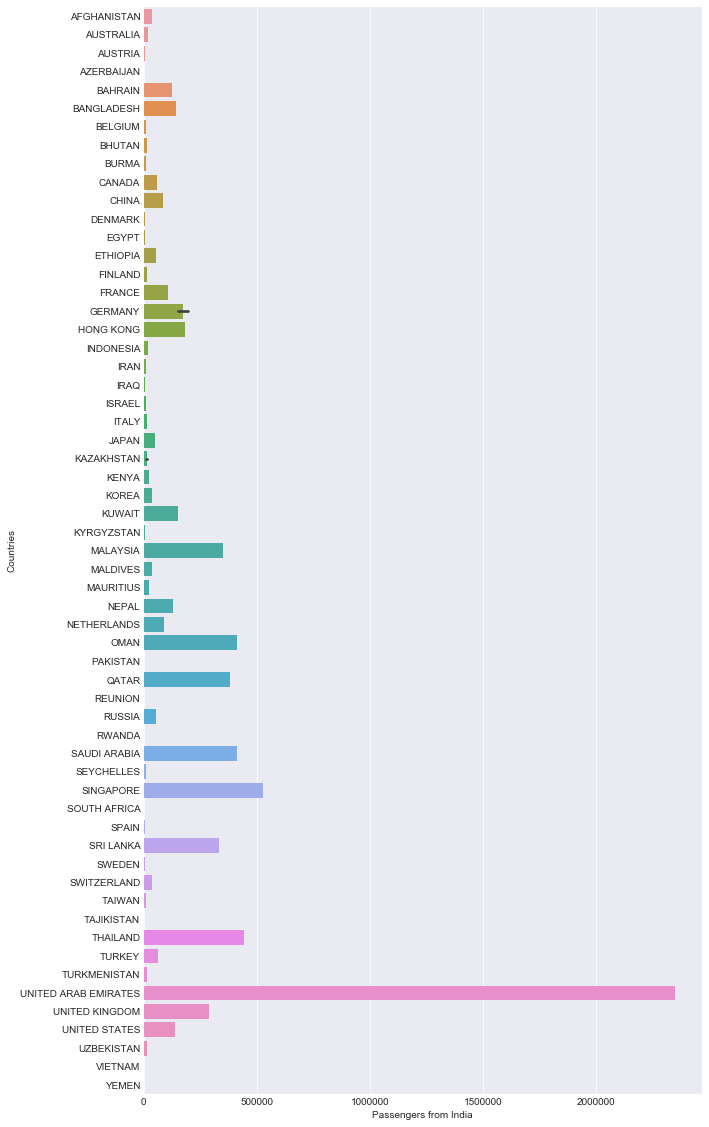

In [28]:
plt.figure(figsize=(10,20))
sns.barplot(x = q4_df.pass_from_India, y = q4_df.country_name)
plt.ylabel("Countries")
plt.xlabel("Passengers from India")
plt.show();

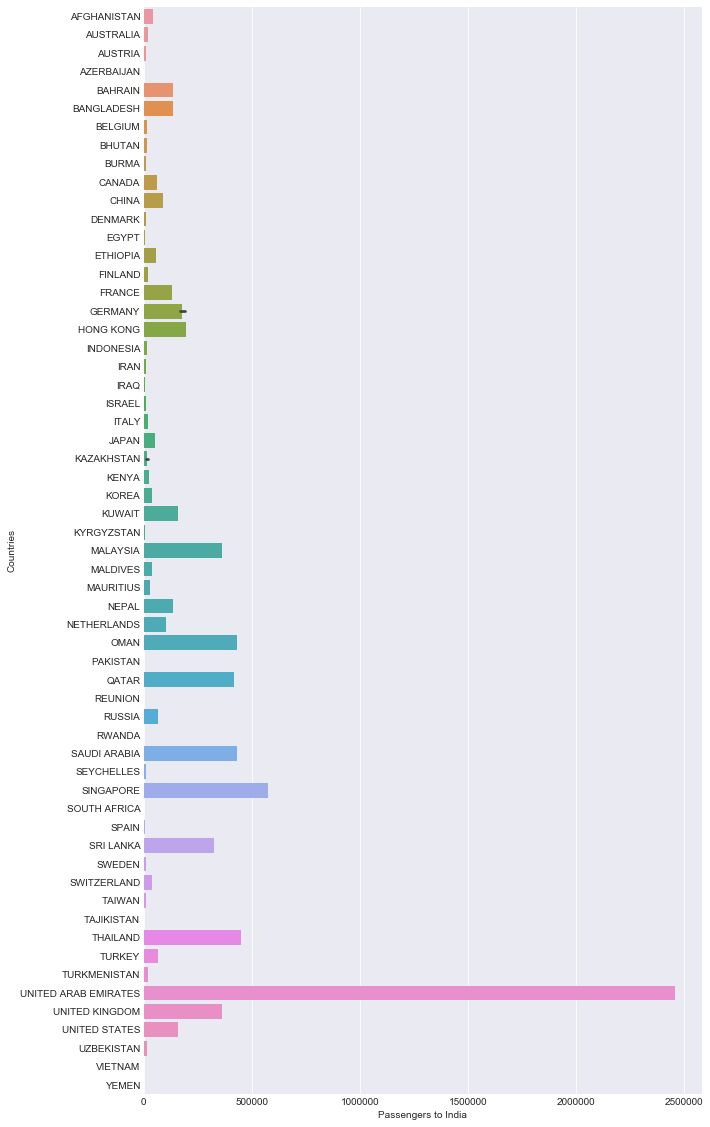

In [29]:
plt.figure(figsize=(10,20))
sns.barplot(x = q4_df.pass_to_India, y = q4_df.country_name)
plt.ylabel("Countries")
plt.xlabel("Passengers to India")
plt.show();

In [30]:
total_df = pd.DataFrame([[q1_df.country_name.iloc[i],
                          sum((q1_df.pass_to_India.iloc[i], q2_df.pass_to_India.iloc[i], 
                               q3_df.pass_to_India.iloc[i], q4_df.pass_to_India.iloc[i])), 
                          sum((q1_df.pass_from_India.iloc[i], q2_df.pass_from_India.iloc[i], 
                               q3_df.pass_from_India.iloc[i], q4_df.pass_from_India.iloc[i])),
                          sum((q1_df.freight_to_India.iloc[i], q2_df.freight_to_India.iloc[i],
                               q3_df.freight_to_India.iloc[i], q4_df.freight_to_India.iloc[i])), 
                          sum((q1_df.freight_from_India.iloc[i], q2_df.freight_from_India.iloc[i],
                               q3_df.freight_from_India.iloc[i], q4_df.freight_from_India.iloc[i]))]
                         for i in range(len(q1_df))], columns=columns[1:])
total_df.country_name = total_df.country_name.astype('category')
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
country_name          61 non-null category
pass_to_India         61 non-null int64
pass_from_India       61 non-null int64
freight_to_India      61 non-null float64
freight_from_India    61 non-null float64
dtypes: category(1), float64(2), int64(2)
memory usage: 5.0 KB


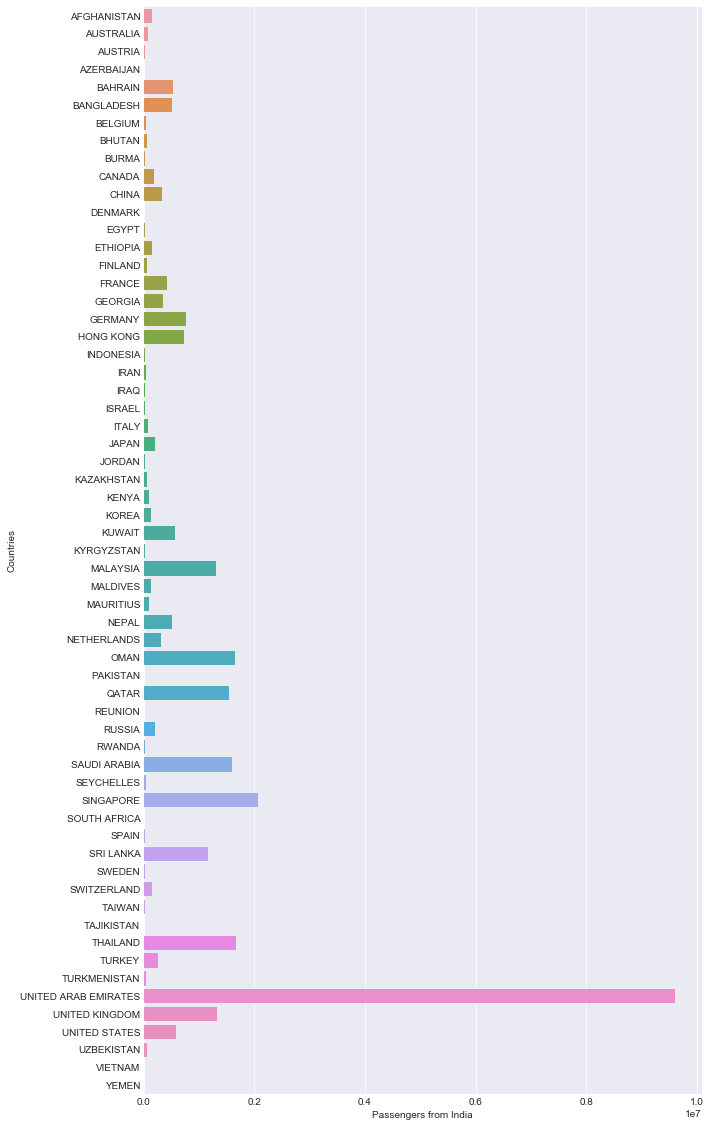

In [31]:
plt.figure(figsize = (10, 20))
sns.barplot(y = total_df.country_name, x = total_df.pass_from_India)
plt.ylabel('Countries')
plt.xlabel('Passengers from India')
plt.show();

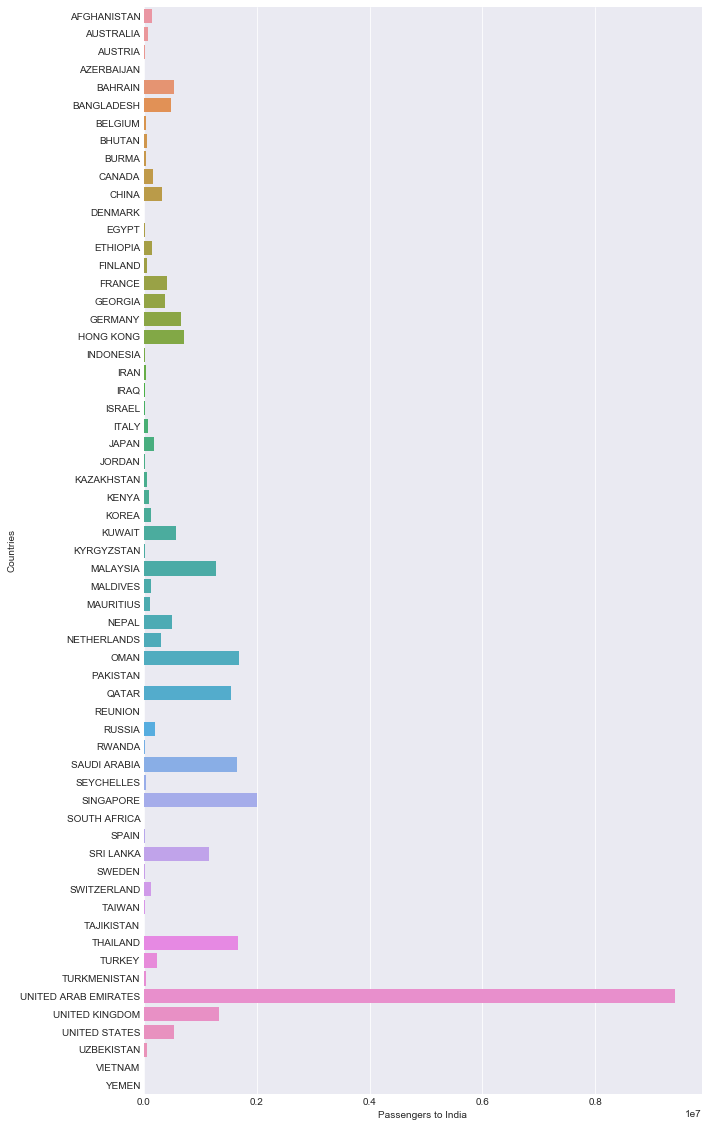

In [32]:
plt.figure(figsize = (10, 20))
sns.barplot(y = total_df.country_name, x = total_df.pass_to_India)
plt.ylabel('Countries')
plt.xlabel('Passengers to India')
plt.show();

No handles with labels found to put in legend.


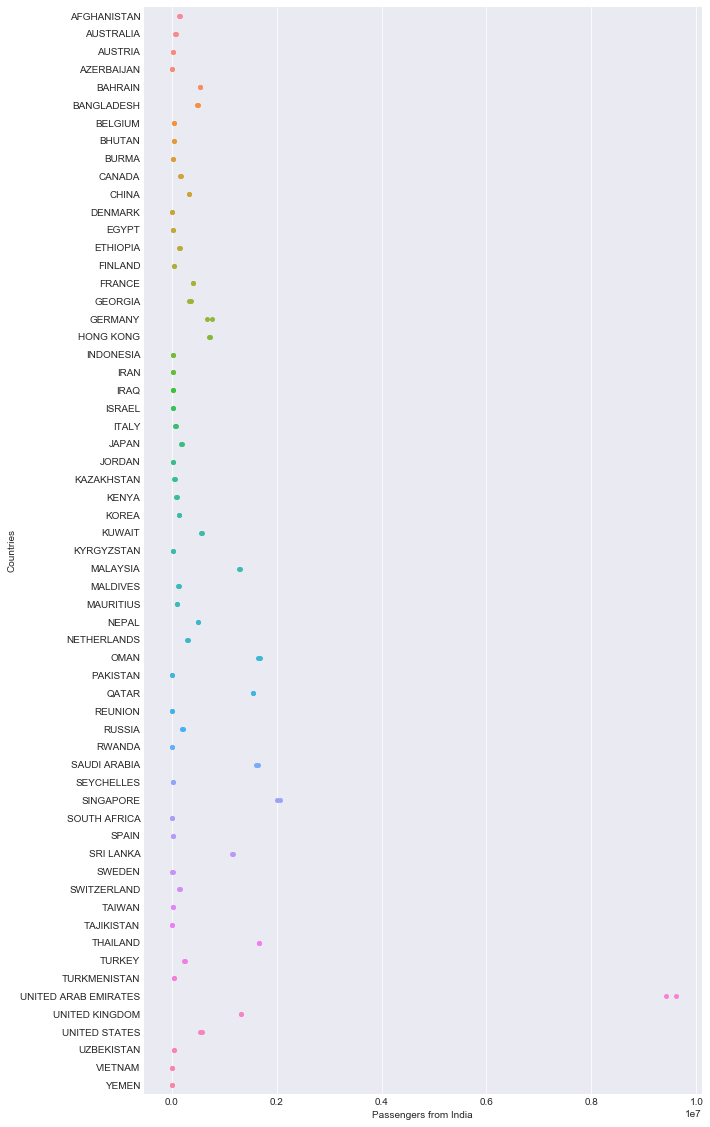

In [33]:
plt.figure(figsize = (10, 20))
sns.swarmplot(y = total_df.country_name, x = total_df.pass_from_India)
sns.swarmplot(y = total_df.country_name, x = total_df.pass_to_India)
plt.ylabel('Countries')
plt.xlabel('Passengers from India')
plt.legend()
plt.show();

In [34]:
total_df.to_csv("Countrywise_DGCA_2017.csv")

In [36]:
q1_df.to_pickle("./q1_df.pkl") 
q2_df.to_pickle("./q2_df.pkl")
q3_df.to_pickle("./q3_df.pkl")
q4_df.to_pickle("./q4_df.pkl")